# Walmart Sales Analysis

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import confusion_matrix

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Projects /Datasets/Walmart_sales.csv'
walmart_data = pd.read_csv(path)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#preprocess the data


# walmart_data['Weekly_Sales'] /= 100000
# walmart_data['Weekly_Sales'] = walmart_data['Weekly_Sales'].round(2)
walmart_data['Weekly_Sales'] = (walmart_data['Weekly_Sales'] / 100000).round(2) # write above 2 lines effectively
walmart_data['CPI'] = walmart_data['CPI'].round(2)
walmart_data['Fuel_Price'] = walmart_data['Fuel_Price'].round(2)
walmart_data['Unemployment'] = walmart_data['Unemployment'].round(2)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,16.44,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,16.42,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,16.12,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,14.10,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,15.55,0,46.50,2.62,211.35,8.11


## visulizations

<ipython-input-5-2719da54f0f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbs.heatmap(walmart_data.corr() , cmap="YlGnBu", annot=True)


<Axes: >

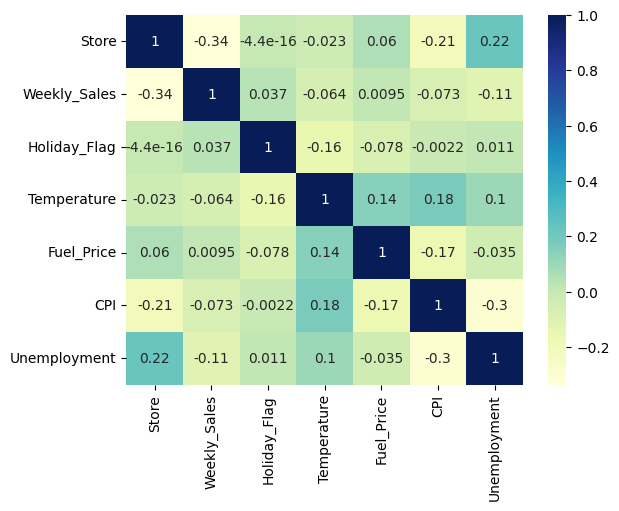

In [5]:
# walmart_data.info()
# walmart_data.describe()
sbs.heatmap(walmart_data.corr() , cmap="YlGnBu", annot=True)

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

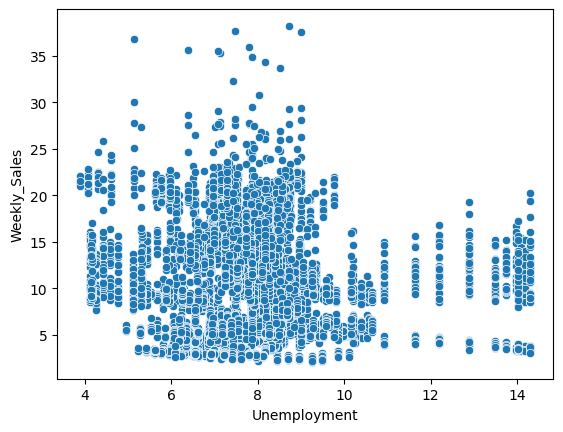

In [6]:
sbs.scatterplot(data=walmart_data , x='Unemployment' , y='Weekly_Sales' , )
# fuel prize is not good feature
# above 9 data points are not present, but high leads no peak in sales

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

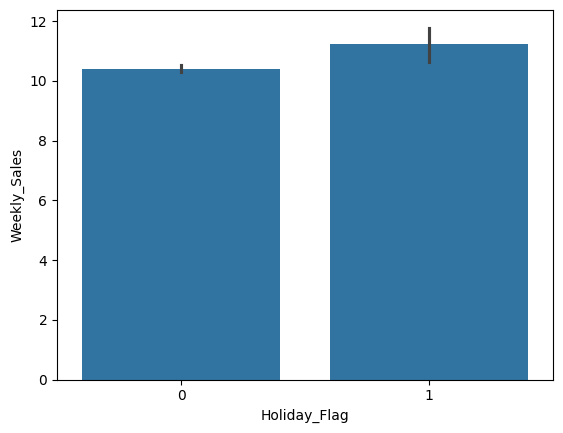

In [7]:
sbs.barplot(data=walmart_data , x='Holiday_Flag' , y='Weekly_Sales', )

(array([  0.,  31.,  59.,  90., 120.]),
 [Text(0.0, 0, '1970-01'),
  Text(31.0, 0, '1970-02'),
  Text(59.0, 0, '1970-03'),
  Text(90.0, 0, '1970-04'),
  Text(120.0, 0, '1970-05')])

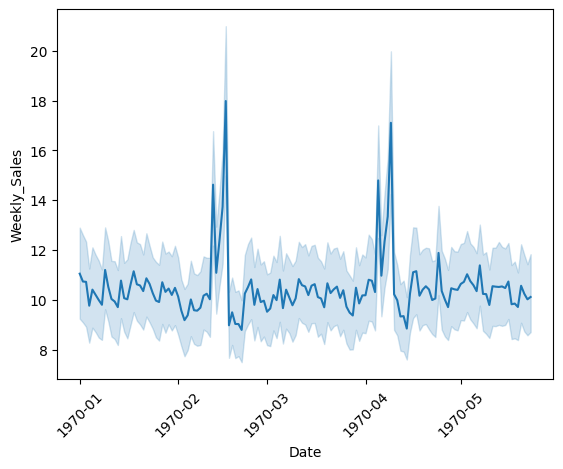

In [8]:
sbs.lineplot(data=walmart_data, x='Date' , y='Weekly_Sales',) # .tick_params(axis='x', rotation=90) to rotate inline
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set the major locator to display ticks by month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the tick labels as 'YYYY-MM'
plt.xticks(rotation=45)

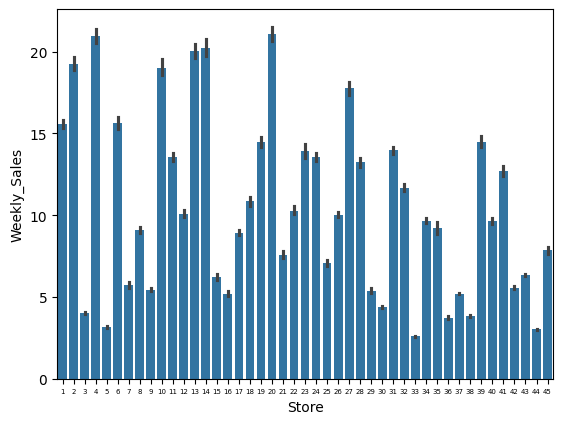

In [9]:
ax = sbs.barplot(data=walmart_data , x='Store' , y='Weekly_Sales', )
ax.tick_params(axis='x', labelsize=5)

In [76]:
sbs.lineplot(data=walmart_data, x='Temperature' , y='Weekly_Sales',) # .tick_params(axis='x', rotation=90) to rotate inline

ValueError: Could not interpret value `Temperature` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

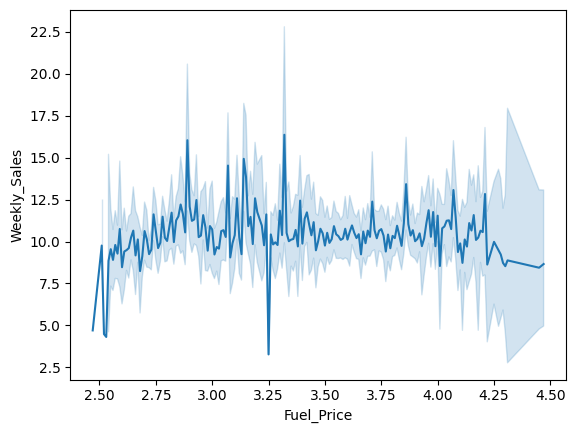

In [11]:
sbs.lineplot(data=walmart_data, x='Fuel_Price' , y='Weekly_Sales',)

## Prediction and stats comparision

In [4]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,16.44,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,16.42,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,16.12,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,14.10,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,15.55,0,46.50,2.62,211.35,8.11


In [5]:
walmart_data.drop(columns=['Date' ,'Fuel_Price' , 'Temperature' ] , inplace=True ) # dropping unnecessary features
walmart_data.head()

,Store,Weekly_Sales,Holiday_Flag,CPI,Unemployment
0,1,16.44,0,211.10,8.11
1,1,16.42,1,211.24,8.11
2,1,16.12,0,211.29,8.11
3,1,14.10,0,211.32,8.11
4,1,15.55,0,211.35,8.11


In [31]:
y = walmart_data['Weekly_Sales']
X = walmart_data.drop(columns=['Weekly_Sales'])

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#create 2 model form sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train , y_train)

LinearRegression()

In [33]:
y_pred_sklearn = model_sklearn.predict(X_test)


In [34]:
model_sm = sm.OLS(y_train, sm.add_constant(X_train))

# Step 5: Fit the model
results_sm = model_sm.fit()

# Step 6: Make predictions (optional)
y_pred_sm = results_sm.predict(sm.add_constant(X_test))

results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     207.5
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          3.03e-165
Time:                        22:43:11   Log-Likelihood:                -15820.
No. Observations:                5148   AIC:                         3.165e+04
Df Residuals:                    5143   BIC:                         3.168e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.0358      0.552     36.328      0.000      18.955      21.117
Store           -0.1507      0.006    -25.899      0.000      -0.162      -0.139
Holiday_Flag     0.8583      0.291      2.947      0.003       0.287       1.429
CPI             -0.0239      0.002    -12.160      0.000      -0.028      -0.020
Unemployment    -0.2574      0.041     -6.217      0.000      -0.339      -0.176
==============================================================================
Omnibus:                      156.665   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.616
Skew:                           0.444   Prob(JB):                     8.94e-38
Kurtosis:                       3.079   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)


In [36]:
print(mse , r2)

27.48830448510954 0.14676934847556633


In [37]:
mse_sm = mean_squared_error(y_test, y_pred_sm)
mse_sm

27.488304485109552

In [60]:
pred = pd.DataFrame()
pred['y_test'] = y_test
pred['y_pred_sm'] = y_pred_sm.round(2)
pred['y_pred_sklearn'] = y_pred_sklearn.round(2)
pred.head()

,y_test,y_pred_sm,y_pred_sklearn
2436,11.39,11.81,11.81
3361,13.05,11.07,11.07
233,17.69,12.62,12.62
3667,10.78,10.90,10.90
5011,4.29,7.39,7.39


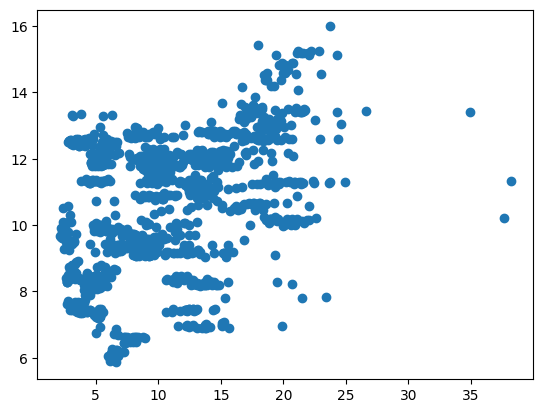

In [62]:
plt.scatter(list(y_test), y_pred_sklearn, label='Predicted')

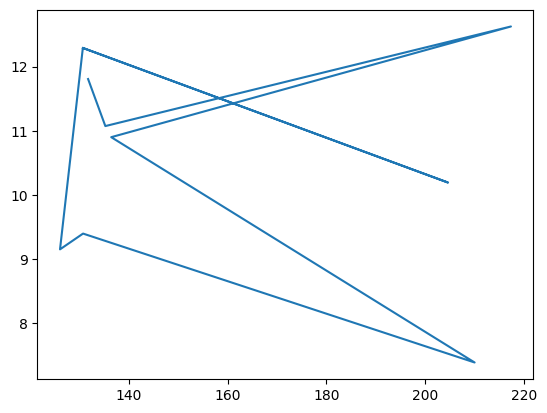

In [65]:
plt.plot(X_test['CPI'][:10] , y_pred_sklearn[:10]) # because we trained into other features as well we didn't get straight line

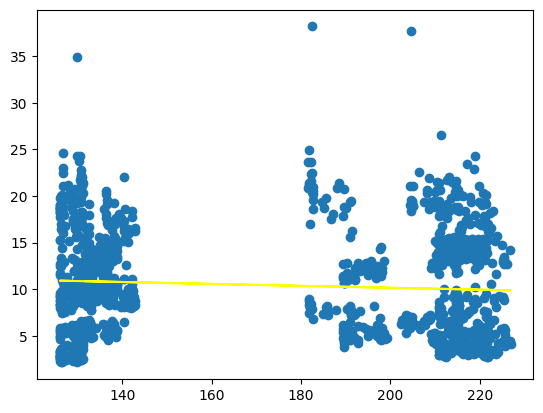

In [72]:
single_model = LinearRegression()

X_single = walmart_data['CPI'].values.reshape(-1, 1)
# X_single = X_single.data(:,np.newaxis,2)
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X_single, y, test_size=0.2, random_state=42)


single_model.fit(X_train1 , y_train1)
y_pred1 = single_model.predict(X_test1)
mse1 = mean_squared_error(y_test1 , y_pred1)

plt.scatter(X_test1,y_test1)
plt.plot(X_test1 , y_pred1 , color='yellow')

In [75]:
df = walmart_data['CPI']

0       211.10
1       211.24
2       211.29
3       211.32
4       211.35
         ...  
6430    192.01
6431    192.17
6432    192.33
6433    192.33
6434    192.31
Name: CPI, Length: 6435, dtype: float64